# Data Analysis of Public Transport with new datasets

In [1]:
#installing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from scipy import stats

## Analysing '2022,2023,2024 Public Transport Data'

In [2]:
# Loading the Excel files
file_path_1 = '2022,2023,2024 Public Transport Data.xlsx'

# Loading the 2022-2024 Public Transport Data sheet
df = pd.read_excel(file_path_1, sheet_name='Passenger Journeys Gold Coast')
df['Fiscal Month'] = pd.to_datetime(df['Fiscal Month'], errors='coerce').dt.to_period('M')
df_clean = df.dropna()

print(df_clean.head())

  Fiscal Month  Gold Coast Light Rail  Queensland Rail  Surfside Buslines  \
0      2022-01                 333770            92855             599234   
1      2022-02                 369991           116914             772641   
2      2022-03                 450552           142197             969454   
3      2022-04                 531790           165392             896297   
4      2022-05                 533585           186616            1009498   

     Total  
0  1025859  
1  1259546  
2  1562203  
3  1593479  
4  1729699  


In [3]:
df_clean.describe()

,Gold Coast Light Rail,Queensland Rail,Surfside Buslines,Total
count,32.000000,32.000000,3.200000e+01,3.200000e+01
mean,666796.468750,204139.593750,1.073266e+06,1.944202e+06
std,120462.910832,40075.774524,1.468247e+05,2.946468e+05
min,333770.000000,92855.000000,5.992340e+05,1.025859e+06
25%,650538.000000,187906.750000,1.014983e+06,1.826918e+06
50%,690676.000000,208762.500000,1.083672e+06,2.001031e+06
75%,727407.250000,225461.750000,1.182554e+06,2.111634e+06
max,922271.000000,312974.000000,1.290216e+06,2.489767e+06


In [4]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32 entries, 0 to 31
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype    
---  ------                 --------------  -----    
 0   Fiscal Month           32 non-null     period[M]
 1   Gold Coast Light Rail  32 non-null     int64    
 2   Queensland Rail        32 non-null     int64    
 3   Surfside Buslines      32 non-null     int64    
 4   Total                  32 non-null     int64    
dtypes: int64(4), period[M](1)
memory usage: 1.5 KB


### Overall Trend Analysis

/var/folders/_4/gs_29qcj0rz_nm8qy011rh_m0000gn/T/ipykernel_46861/1070501011.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['Year'] = df_clean['Fiscal Month'].dt.year


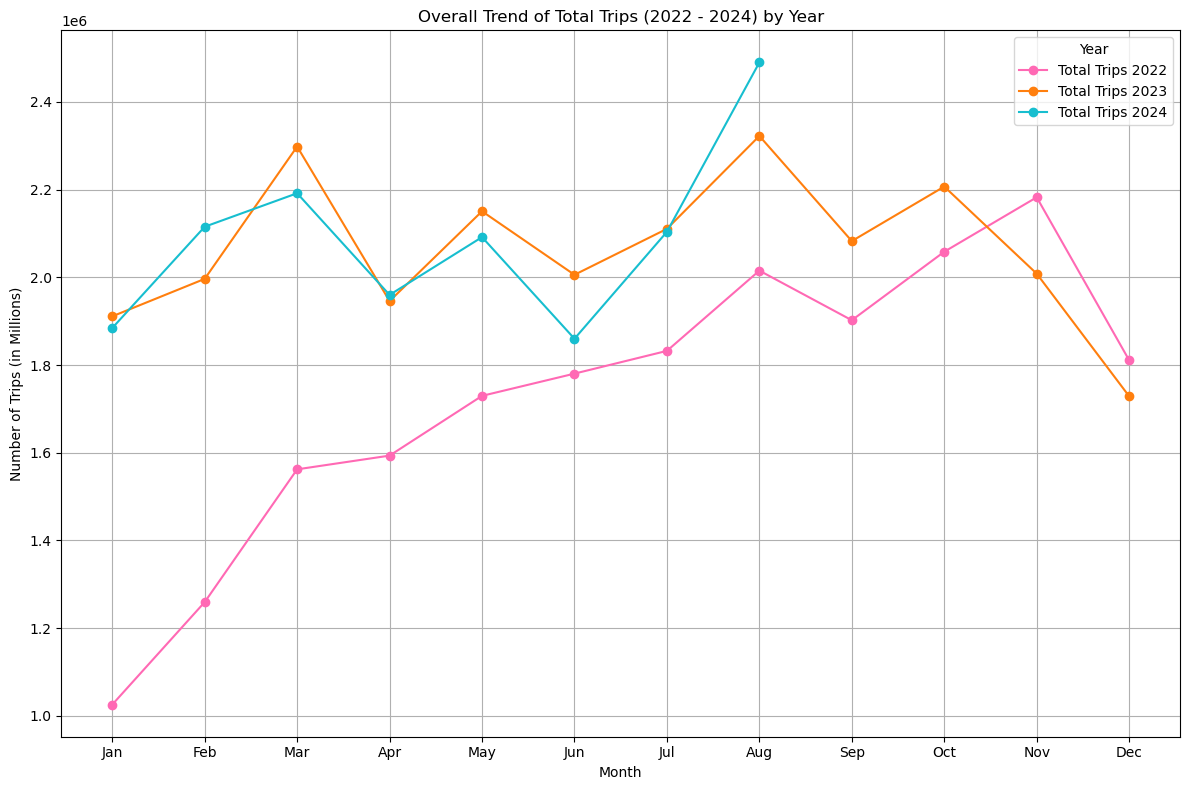

In [5]:
# Creating a new column for year to distinguishing different years
df_clean['Year'] = df_clean['Fiscal Month'].dt.year

# Plotting
plt.figure(figsize=(12, 8))

colors = ['#ff69b4', '#ff7f0e', '#17becf']
for idx, year in enumerate(df_clean['Year'].unique()):
    year_data = df_clean[df_clean['Year'] == year]
    # Extracting only the month name for display on the x-axis
    plt.plot(year_data['Fiscal Month'].dt.strftime('%b'), year_data['Total'], 
             marker='o', linestyle='-', color=colors[idx], label=f'Total Trips {year}')

plt.title('Overall Trend of Total Trips (2022 - 2024) by Year')
plt.xlabel('Month')
plt.ylabel('Number of Trips (in Millions)')
plt.grid(True)
plt.legend(title='Year')
plt.tight_layout()
plt.show()

#### Findings:
##### 1. Overview: This graph shows the overall trend of total trips for three different years (2022, 2023, and 2024). The x-axis represents the months from January to December, while the y-axis represents the number of trips in millions.
##### 2. Observation:
      A. 2022 had a steady rise in trips across the months, with no sharp fluctuations.
      B. 2023 had a relatively high start, peaked in June, and then had a notable decline by December.
      C. 2024 was following a similar pattern to 2023 but with more variability, especially in the latter part of the year, where August and September saw noticeable peaks.
##### 3. Conclusion: The rise in August and September 2024 may correspond with the 50c trial, causing increased public transport usage during these months.

### YoY % Change

In [6]:
# Filtering data for June, July, August, and September
df_modes_june_sept = df_clean[df_clean['Fiscal Month'].dt.month.isin([6, 7, 8, 9])]

# Adding Year and Month columns
df_modes_june_sept['Year'] = df_modes_june_sept['Fiscal Month'].dt.year
df_modes_june_sept['Month'] = df_modes_june_sept['Fiscal Month'].dt.month

# Pivoting the data for each transport mode & total
df_pivot_modes = df_modes_june_sept.pivot(index='Month', columns='Year', values=['Gold Coast Light Rail', 'Queensland Rail', 'Surfside Buslines'])
df_pivot_total = df_modes_june_sept.pivot(index='Month', columns='Year', values='Total')

# Calculating YoY percentage changes for each transport mode and total
df_pivot_modes['Gold Coast Light Rail YoY 2022-2023'] = (df_pivot_modes['Gold Coast Light Rail', 2023] - df_pivot_modes['Gold Coast Light Rail', 2022]) / df_pivot_modes['Gold Coast Light Rail', 2022] * 100
df_pivot_modes['Gold Coast Light Rail YoY 2023-2024'] = (df_pivot_modes['Gold Coast Light Rail', 2024] - df_pivot_modes['Gold Coast Light Rail', 2023]) / df_pivot_modes['Gold Coast Light Rail', 2023] * 100

df_pivot_modes['Queensland Rail YoY 2022-2023'] = (df_pivot_modes['Queensland Rail', 2023] - df_pivot_modes['Queensland Rail', 2022]) / df_pivot_modes['Queensland Rail', 2022] * 100
df_pivot_modes['Queensland Rail YoY 2023-2024'] = (df_pivot_modes['Queensland Rail', 2024] - df_pivot_modes['Queensland Rail', 2023]) / df_pivot_modes['Queensland Rail', 2023] * 100

df_pivot_modes['Surfside Buslines YoY 2022-2023'] = (df_pivot_modes['Surfside Buslines', 2023] - df_pivot_modes['Surfside Buslines', 2022]) / df_pivot_modes['Surfside Buslines', 2022] * 100
df_pivot_modes['Surfside Buslines YoY 2023-2024'] = (df_pivot_modes['Surfside Buslines', 2024] - df_pivot_modes['Surfside Buslines', 2023]) / df_pivot_modes['Surfside Buslines', 2023] * 100

df_pivot_total['Total YoY 2022-2023'] = (df_pivot_total[2023] - df_pivot_total[2022]) / df_pivot_total[2022] * 100
df_pivot_total['Total YoY 2023-2024'] = (df_pivot_total[2024] - df_pivot_total[2023]) / df_pivot_total[2023] * 100

# Formatting the output for each mode
months_mapping = {6: "June", 7: "July", 8: "August", 9: "September"}

def format_yoy_output(mode, df, column_2022_2023, column_2023_2024):
    print(f"• {mode}:")
    for month in df.index:
        print(f"    • {months_mapping[month]}:")
        print(f"        • YoY 2022-2023: {df[column_2022_2023][month]:.2f}%")
        if not pd.isna(df[column_2023_2024][month]):
            print(f"        • YoY 2023-2024: {df[column_2023_2024][month]:.2f}%")
        else:
            print(f"        • YoY 2023-2024: Data not available")

# Calling the function to display YoY results for each transport mode
format_yoy_output("Gold Coast Light Rail", df_pivot_modes, 
                  'Gold Coast Light Rail YoY 2022-2023', 'Gold Coast Light Rail YoY 2023-2024')

format_yoy_output("Queensland Rail", df_pivot_modes, 
                  'Queensland Rail YoY 2022-2023', 'Queensland Rail YoY 2023-2024')

format_yoy_output("Surfside Buslines", df_pivot_modes, 
                  'Surfside Buslines YoY 2022-2023', 'Surfside Buslines YoY 2023-2024')

# Formatting output for Total YoY
def format_yoy_total_output(df_total):
    print("\n• Total Trips Across All Modes:")
    for month in df_total.index:
        print(f"    • {months_mapping[month]}:")
        print(f"        • YoY 2022-2023: {df_total['Total YoY 2022-2023'][month]:.2f}%")
        if not pd.isna(df_total['Total YoY 2023-2024'][month]):
            print(f"        • YoY 2023-2024: {df_total['Total YoY 2023-2024'][month]:.2f}%")
        else:
            print(f"        • YoY 2023-2024: Data not available")

# Calling the function to display total YoY results
format_yoy_total_output(df_pivot_total)

• Gold Coast Light Rail:
    • June:
        • YoY 2022-2023: 18.68%
        • YoY 2023-2024: -5.28%
    • July:
        • YoY 2022-2023: 21.19%
        • YoY 2023-2024: -1.41%
    • August:
        • YoY 2022-2023: 24.56%
        • YoY 2023-2024: 12.83%
    • September:
        • YoY 2022-2023: 17.95%
        • YoY 2023-2024: Data not available
• Queensland Rail:
    • June:
        • YoY 2022-2023: 5.57%
        • YoY 2023-2024: -10.77%
    • July:
        • YoY 2022-2023: 11.27%
        • YoY 2023-2024: -2.42%
    • August:
        • YoY 2022-2023: 11.04%
        • YoY 2023-2024: 23.80%
    • September:
        • YoY 2022-2023: 2.59%
        • YoY 2023-2024: Data not available
• Surfside Buslines:
    • June:
        • YoY 2022-2023: 10.68%
        • YoY 2023-2024: -7.80%
    • July:
        • YoY 2022-2023: 12.27%
        • YoY 2023-2024: 0.79%
    • August:
        • YoY 2022-2023: 10.67%
        • YoY 2023-2024: 0.20%
    • September:
        • YoY 2022-2023: 5.50%
        • YoY 

/var/folders/_4/gs_29qcj0rz_nm8qy011rh_m0000gn/T/ipykernel_46861/1396438714.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_modes_june_sept['Year'] = df_modes_june_sept['Fiscal Month'].dt.year
/var/folders/_4/gs_29qcj0rz_nm8qy011rh_m0000gn/T/ipykernel_46861/1396438714.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_modes_june_sept['Month'] = df_modes_june_sept['Fiscal Month'].dt.month


#### Explanation:
Standard formula to calculate % change i.e. [(New value) - (Old Value)] / (Old Value) * 100

##### Interpreting the O/P
1. Positive O/P when New Value is greater than previous value e.g. August 2024 v/s August 2023
2. Negative O/P when New Value is lower than previous value e.g. June 2024 v/s June 2023
3. It would have been 0 if values were same. Not applicable for our case.

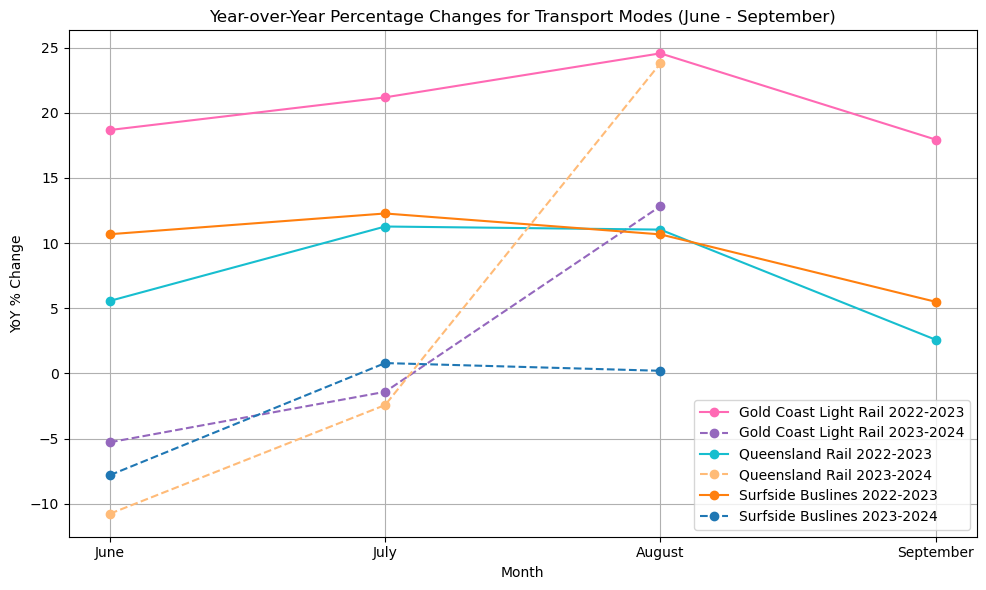

In [7]:
# Using 6 distinct colours
colors = {'pink': '#ff69b4', 'orange': '#ff7f0e', 'teal': '#17becf', 'purple': '#9467bd', 'yellow': '#ffbb78', 'blue': '#1f77b4'}

# Plotting the YoY percentage changes for each transport mode using real data
plt.figure(figsize=(10, 6))

# Plotting Gold Coast Light Rail YoY percentage changes
plt.plot(df_pivot_modes.index, df_pivot_modes['Gold Coast Light Rail YoY 2022-2023'], 
         marker='o', linestyle='-', color=colors['pink'], label='Gold Coast Light Rail 2022-2023')
plt.plot(df_pivot_modes.index, df_pivot_modes['Gold Coast Light Rail YoY 2023-2024'], 
         marker='o', linestyle='--', color=colors['purple'], label='Gold Coast Light Rail 2023-2024')

# Plotting Queensland Rail YoY percentage changes
plt.plot(df_pivot_modes.index, df_pivot_modes['Queensland Rail YoY 2022-2023'], 
         marker='o', linestyle='-', color=colors['teal'], label='Queensland Rail 2022-2023')
plt.plot(df_pivot_modes.index, df_pivot_modes['Queensland Rail YoY 2023-2024'], 
         marker='o', linestyle='--', color=colors['yellow'], label='Queensland Rail 2023-2024')

# Plotting Surfside Buslines YoY percentage changes
plt.plot(df_pivot_modes.index, df_pivot_modes['Surfside Buslines YoY 2022-2023'], 
         marker='o', linestyle='-', color=colors['orange'], label='Surfside Buslines 2022-2023')
plt.plot(df_pivot_modes.index, df_pivot_modes['Surfside Buslines YoY 2023-2024'], 
         marker='o', linestyle='--', color=colors['blue'], label='Surfside Buslines 2023-2024')

# Customising the plot
plt.title('Year-over-Year Percentage Changes for Transport Modes (June - September)')
plt.xlabel('Month')
plt.ylabel('YoY % Change')
plt.xticks(ticks=df_pivot_modes.index, labels=[months_mapping[m] for m in df_pivot_modes.index])
plt.grid(True)
plt.legend()
plt.tight_layout()

plt.show()

#### Findings:
##### 1. Overview: This graph shows the year-over-year (YoY) percentage changes for three public transport modes (Gold Coast Light Rail, Queensland Rail, and Surfside Buslines) from June to September over two different time periods(2022 - 2023 and 2023 - 2024). 
##### 2. Observation:
      A. The Gold Coast Light Rail saw the most significant increase from 2022 to 2023, and despite starting at a negative percentage in 2023-2024, it showed strong recovery by August.
      B. Queensland Rail showed modest year-over-year changes, with a slight improvement in both periods, peaking in August 2024.
      C. Surfside Buslines experienced a recovery from negative values in both periods, but the 2023-2024 increase in August was much more drastic.
##### 3. Conclusion: The 50c fare trial in August 2024 significantly boosted public transport usage, particularly for the Gold Coast Light Rail and Surfside Buslines, both of which saw marked increases compared to previous months and years. While Queensland Rail also showed a modest rise, its growth was less pronounced. The sharp spike in August, followed by slight declines in September, indicates the trial had a substantial but possibly temporary impact on travel behavior. 

### Mode Share Analysis

/var/folders/_4/gs_29qcj0rz_nm8qy011rh_m0000gn/T/ipykernel_46861/3259832169.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_modes_june_sept['Gold Coast Light Rail Share'] = (df_modes_june_sept['Gold Coast Light Rail'] / df_modes_june_sept['Total']) * 100
/var/folders/_4/gs_29qcj0rz_nm8qy011rh_m0000gn/T/ipykernel_46861/3259832169.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_modes_june_sept['Queensland Rail Share'] = (df_modes_june_sept['Queensland Rail'] / df_modes_june_sept['Total']) * 100


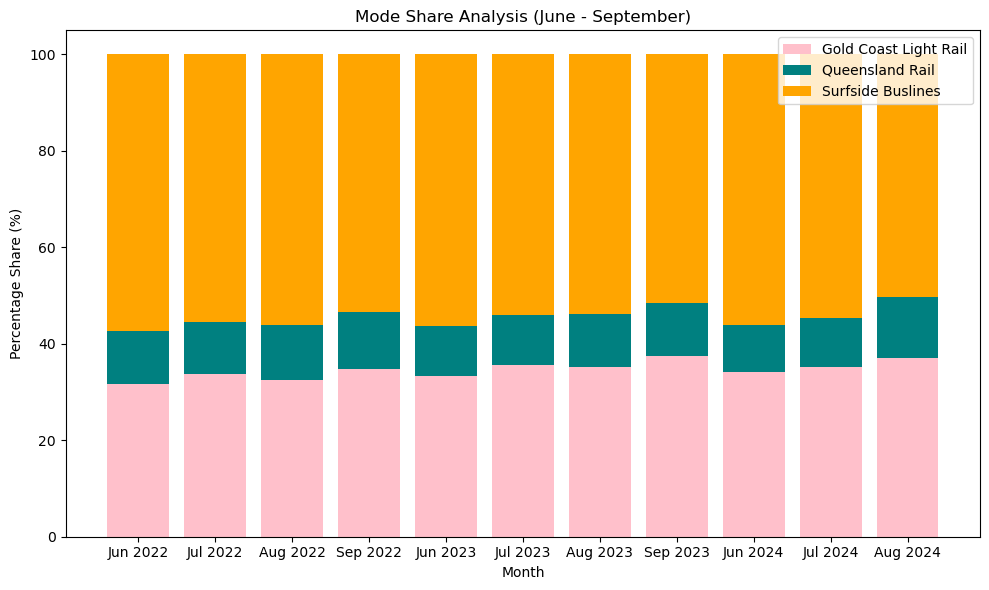

In [8]:
# Calculating the mode share (percentage of total trips) for each transport mode
df_modes_june_sept['Gold Coast Light Rail Share'] = (df_modes_june_sept['Gold Coast Light Rail'] / df_modes_june_sept['Total']) * 100
df_modes_june_sept['Queensland Rail Share'] = (df_modes_june_sept['Queensland Rail'] / df_modes_june_sept['Total']) * 100
df_modes_june_sept['Surfside Buslines Share'] = (df_modes_june_sept['Surfside Buslines'] / df_modes_june_sept['Total']) * 100

# Defining the months for X-axis
months = df_modes_june_sept['Fiscal Month'].dt.strftime('%b %Y')

# Plotting the stacked bar chart
plt.figure(figsize=(10, 6))
plt.bar(months, df_modes_june_sept['Gold Coast Light Rail Share'], color='pink', label='Gold Coast Light Rail')
plt.bar(months, df_modes_june_sept['Queensland Rail Share'], bottom=df_modes_june_sept['Gold Coast Light Rail Share'], color='teal', label='Queensland Rail')
plt.bar(months, df_modes_june_sept['Surfside Buslines Share'], 
        bottom=df_modes_june_sept['Gold Coast Light Rail Share'] + df_modes_june_sept['Queensland Rail Share'], 
        color='orange', label='Surfside Buslines')

# Customising the plot
plt.title('Mode Share Analysis (June - September)')
plt.xlabel('Month')
plt.ylabel('Percentage Share (%)')
plt.legend()
plt.tight_layout()

plt.show()

#### Findings:
##### 1. Overview: This graph shows the year-over-year (YoY) percentage changes for three public transport modes (Gold Coast Light Rail, Queensland Rail, and Surfside Buslines) from June to September over two different time periods(2022 - 2023 and 2023 - 2024). 
##### 2. Observation:
      A. The Gold Coast Light Rail consistently holds around 30% of the mode share.
      B. Queensland Rail has a steady share, making up around 10-15% of the total mode. Its contribution remains stable, similar to the light rail.
      C. Surfside Buslines consistently dominates the mode share, accounting for around 60% or more. This indicates that bus usage is the most prevalent mode of transport compared to the other two.
##### 3. Conclusion: The graph highlights the stable distribution of public transport mode share in the Gold Coast region, with Surfside Buslines consistently holding the largest share, followed by Gold Coast Light Rail and Queensland Rail. Despite policy changes like the 50c fare trial in August 2024, the relative distribution of these modes remains largely unchanged, indicating strong preferences for bus transport.

### Peak vs Off Peak Month Analysis

In [9]:
# Finding the Peak and Off-Peak months for each transport mode and total trips
peak_off_peak_summary = {}

# For each mode, finding the month with the highest and lowest trips
modes = ['Gold Coast Light Rail', 'Queensland Rail', 'Surfside Buslines', 'Total']

for mode in modes:
    peak_month = df_modes_june_sept.loc[df_modes_june_sept[mode].idxmax(), 'Fiscal Month'].strftime('%b %Y')
    off_peak_month = df_modes_june_sept.loc[df_modes_june_sept[mode].idxmin(), 'Fiscal Month'].strftime('%b %Y')
    
    peak_off_peak_summary[mode] = {
        'Peak Month': peak_month,
        'Off-Peak Month': off_peak_month,
        'Peak Trips': df_modes_june_sept[mode].max(),
        'Off-Peak Trips': df_modes_june_sept[mode].min()
    }

# Displaying the peak and off-peak summary
peak_off_peak_df = pd.DataFrame(peak_off_peak_summary).T
print(peak_off_peak_df)

                      Peak Month Off-Peak Month Peak Trips Off-Peak Trips
Gold Coast Light Rail   Aug 2024       Jun 2022     922271         563579
Queensland Rail         Aug 2024       Jun 2024     312974         183718
Surfside Buslines       Aug 2024       Jul 2022    1254522        1016811
Total                   Aug 2024       Jun 2022    2489767        1780385


#### Findings:
##### 1. Overview: This table provides an analysis of peak and off-peak trips for three transport modes. 
##### 2. Observation and Conclusion:
      A. All transport modes reached their peak usage in August 2024, which aligns with the 50c fare trial, suggesting that the trial significantly boosted ridership.
      B. The off-peak months vary, with Gold Coast Light Rail experiencing its lowest ridership in June 2022, while Queensland Rail's off-peak was in June 2024 and Surfside Buslines in July 2022.
      C. The difference between peak and off-peak trips is most notable for Surfside Buslines, which consistently maintains higher ridership even during off-peak months.
      D. The data strongly suggests that the 50c fare trial in August 2024 drove substantial increases in public transport usage across all modes, with the highest trip counts recorded during that month. However, trip numbers during off-peak months were relatively lower.

/var/folders/_4/gs_29qcj0rz_nm8qy011rh_m0000gn/T/ipykernel_46861/2273209713.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_modes_june_sept['Total in Millions'] = df_modes_june_sept['Total'] / 1e6


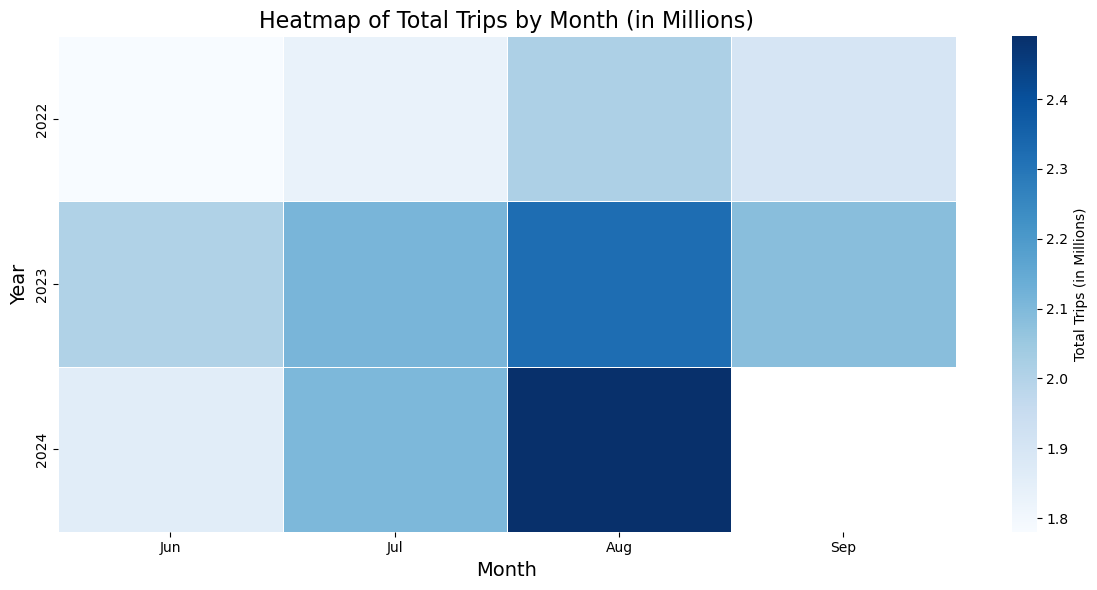

In [10]:
import seaborn as sns
# Dividing 'Total' by 1 million to get 'Total in Millions'
df_modes_june_sept['Total in Millions'] = df_modes_june_sept['Total'] / 1e6

# Preparing the data for the heatmap (with trips shown in millions)
heatmap_data_full = df_modes_june_sept.pivot_table(index=df_modes_june_sept['Fiscal Month'].dt.strftime('%Y'), 
                                                   columns=df_modes_june_sept['Fiscal Month'].dt.strftime('%b'), 
                                                   values='Total in Millions')

# Reindexing to ensure all months (Jun, Jul, Aug, Sep) are included
months_order = ['Jun', 'Jul', 'Aug', 'Sep']
heatmap_data_full = heatmap_data_full.reindex(columns=months_order)

# Plotting the heatmap
plt.figure(figsize=(12, 6))
ax = sns.heatmap(heatmap_data_full, annot=False, cmap='Blues', cbar_kws={'label': 'Total Trips (in Millions)'}, linewidths=0.5)

# Customising the plot
ax.set_title('Heatmap of Total Trips by Month (in Millions)', fontsize=16)
ax.set_xlabel('Month', fontsize=14)
ax.set_ylabel('Year', fontsize=14)

ax.set_xticklabels(ax.get_xticklabels(), rotation=0, horizontalalignment='center')

plt.tight_layout()

plt.show()

#### Findings:
##### 1. Overview: This heatmap shows the total trips by month (in millions) for June to September over the years 2022, 2023, and 2024. 
##### 2. Observation:
      A. June to September is consistently light in color, indicating that total trips were lower in 2022 (around 1.8 to 2 million trips across these months).
      B. In 2023 there is a moderate increase in trips, especially in July and August, which are darker compared to June and September. These months likely saw over 2.2 million trips.
      C. August 2024 is the darkest square on the heatmap, indicating the highest trip count, exceeding 2.4 million trips. 
      D. June, July, and September 2024 are lighter, indicating trip counts closer to 2 million, but still higher than 2022 levels.
##### 3. Conclusion: The heatmap clearly highlights that August 2024 saw a significant spike in public transport usage, with over 2.4 million trips, which coincides with the 50c fare trial. Other months, particularly in 2022 and early 2024, show fewer total trips, reinforcing the impact of fare changes and other factors on ridership behavior.

## Analysing 'Weekday vs Weekend Public Transport Data'

In [11]:
# Loading the Excel files
file_path_2 = 'Weekday vs Weekend Public Transport Data.xlsx'

# Loading the Weekday and Weekend data
df_weekday = pd.read_excel(file_path_2, sheet_name='Weekday')
df_weekend = pd.read_excel(file_path_2, sheet_name='Weekend')

# Renaming columns 
df_weekday.columns = ['Fiscal Month', 'Gold Coast Light Rail', 'Queensland Rail', 'Surfside Buslines', 'Total']
df_weekend.columns = ['Fiscal Month', 'Gold Coast Light Rail', 'Queensland Rail', 'Surfside Buslines', 'Total']

# Converting 'Fiscal Month' for both datasets to month-year format
df_weekday['Fiscal Month'] = pd.to_datetime(df_weekday['Fiscal Month'], errors='coerce').dt.to_period('M')
df_weekend['Fiscal Month'] = pd.to_datetime(df_weekend['Fiscal Month'], errors='coerce').dt.to_period('M')

# Droping rows with missing data
df_weekday_clean = df_weekday.dropna()
df_weekend_clean = df_weekend.dropna()

# Displaying the first few rows of each dataframe
print(df_weekday_clean.head())
print(df_weekend_clean.head())

  Fiscal Month Gold Coast Light Rail Queensland Rail Surfside Buslines  \
1      2022-01                240966           71322            441193   
2      2022-02                287600           98396            634978   
3      2022-03                372795          127735            811952   
4      2022-04                399302          136011            698182   
5      2022-05                415053          157756            834430   

     Total  
1   753481  
2  1020974  
3  1312482  
4  1233495  
5  1407239  
  Fiscal Month Gold Coast Light Rail Queensland Rail Surfside Buslines   Total
1      2022-01                 92804           21533            158041  272378
2      2022-02                 82391           18518            137663  238572
3      2022-03                 77757           14462            157502  249721
4      2022-04                132488           29381            198115  359984
5      2022-05                118532           28860            175068  322460


/var/folders/_4/gs_29qcj0rz_nm8qy011rh_m0000gn/T/ipykernel_46861/1080081055.py:13: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_weekday['Fiscal Month'] = pd.to_datetime(df_weekday['Fiscal Month'], errors='coerce').dt.to_period('M')
/var/folders/_4/gs_29qcj0rz_nm8qy011rh_m0000gn/T/ipykernel_46861/1080081055.py:14: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_weekend['Fiscal Month'] = pd.to_datetime(df_weekend['Fiscal Month'], errors='coerce').dt.to_period('M')


   Fiscal Month Weekday Total Trips Weekend Total Trips
0       2022-01              753481              272378
1       2022-02             1020974              238572
2       2022-03             1312482              249721
3       2022-04             1233495              359984
4       2022-05             1407239              322460
5       2022-06             1440215              340170
6       2022-07             1406820              425422
7       2022-08             1648552              366616
8       2022-09             1525410              376670
9       2022-10             1589260              468998
10      2022-11             1750978              431385
11      2022-12             1408818              402127
12      2023-01             1466512              444473
13      2023-02             1574723              421655
14      2023-03             1895393              402616
15      2023-04             1428894              516950
16      2023-05             1757618             

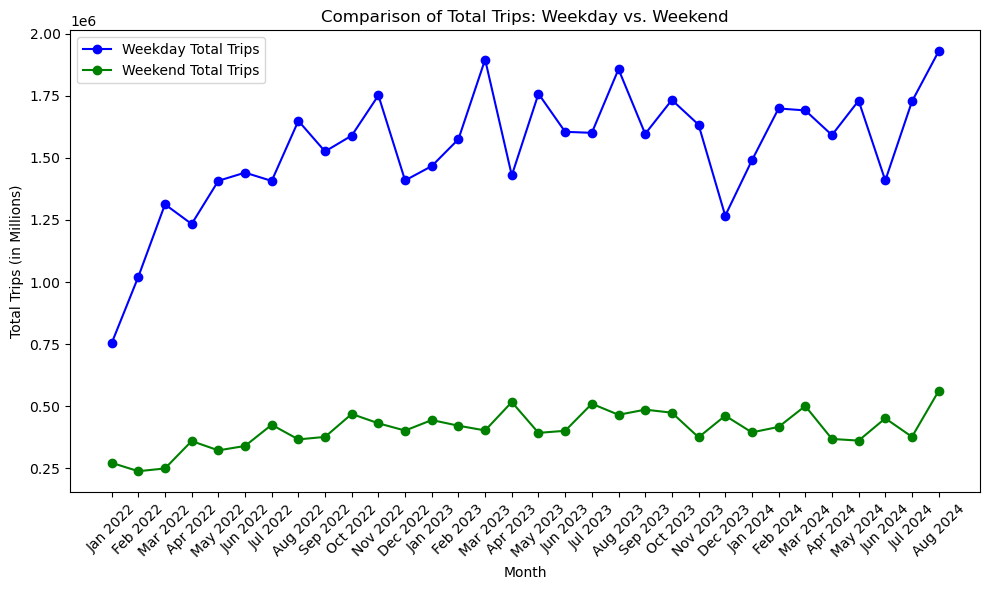

In [12]:
# Aggregating the total trips for weekdays and weekends to compare over time
weekday_total_trips = df_weekday_clean.groupby(df_weekday_clean['Fiscal Month']).sum()['Total']
weekend_total_trips = df_weekend_clean.groupby(df_weekend_clean['Fiscal Month']).sum()['Total']

# Creating a combined dataframe for both weekday and weekend total trips
comparison_df = pd.DataFrame({
    'Weekday Total Trips': weekday_total_trips,
    'Weekend Total Trips': weekend_total_trips
}).reset_index()

# Displaying
print(comparison_df)

# Visualizing the comparison with a line plot
plt.figure(figsize=(10, 6))
plt.plot(comparison_df['Fiscal Month'].dt.strftime('%b %Y'), comparison_df['Weekday Total Trips'], label='Weekday Total Trips', marker='o', color='blue')
plt.plot(comparison_df['Fiscal Month'].dt.strftime('%b %Y'), comparison_df['Weekend Total Trips'], label='Weekend Total Trips', marker='o', color='green')

# Customising the plot
plt.title('Comparison of Total Trips: Weekday vs. Weekend')
plt.xlabel('Month')
plt.ylabel('Total Trips (in Millions)')
plt.xticks(rotation=45)
plt.legend()

plt.tight_layout()
plt.show()

### Mode share Analysis (Weekday vs Weekend)

In [12]:
# Calculating the total trips for each mode for weekdays
weekday_mode_share = df_weekday_clean.groupby(df_weekday_clean['Fiscal Month']).sum()
weekday_mode_share['Total'] = weekday_mode_share[['Gold Coast Light Rail', 'Queensland Rail', 'Surfside Buslines']].sum(axis=1)
weekday_mode_share['Gold Coast Light Rail Share'] = (weekday_mode_share['Gold Coast Light Rail'] / weekday_mode_share['Total']) * 100
weekday_mode_share['Queensland Rail Share'] = (weekday_mode_share['Queensland Rail'] / weekday_mode_share['Total']) * 100
weekday_mode_share['Surfside Buslines Share'] = (weekday_mode_share['Surfside Buslines'] / weekday_mode_share['Total']) * 100

# Calculating the total trips for each mode for weekends
weekend_mode_share = df_weekend_clean.groupby(df_weekend_clean['Fiscal Month']).sum()
weekend_mode_share['Total'] = weekend_mode_share[['Gold Coast Light Rail', 'Queensland Rail', 'Surfside Buslines']].sum(axis=1)
weekend_mode_share['Gold Coast Light Rail Share'] = (weekend_mode_share['Gold Coast Light Rail'] / weekend_mode_share['Total']) * 100
weekend_mode_share['Queensland Rail Share'] = (weekend_mode_share['Queensland Rail'] / weekend_mode_share['Total']) * 100
weekend_mode_share['Surfside Buslines Share'] = (weekend_mode_share['Surfside Buslines'] / weekend_mode_share['Total']) * 100

# Creating a combined dataframe for mode shares
mode_share_df = pd.DataFrame({
    'Weekday Gold Coast Light Rail Share': weekday_mode_share['Gold Coast Light Rail Share'],
    'Weekday Queensland Rail Share': weekday_mode_share['Queensland Rail Share'],
    'Weekday Surfside Buslines Share': weekday_mode_share['Surfside Buslines Share'],
    'Weekend Gold Coast Light Rail Share': weekend_mode_share['Gold Coast Light Rail Share'],
    'Weekend Queensland Rail Share': weekend_mode_share['Queensland Rail Share'],
    'Weekend Surfside Buslines Share': weekend_mode_share['Surfside Buslines Share']
}).reset_index()

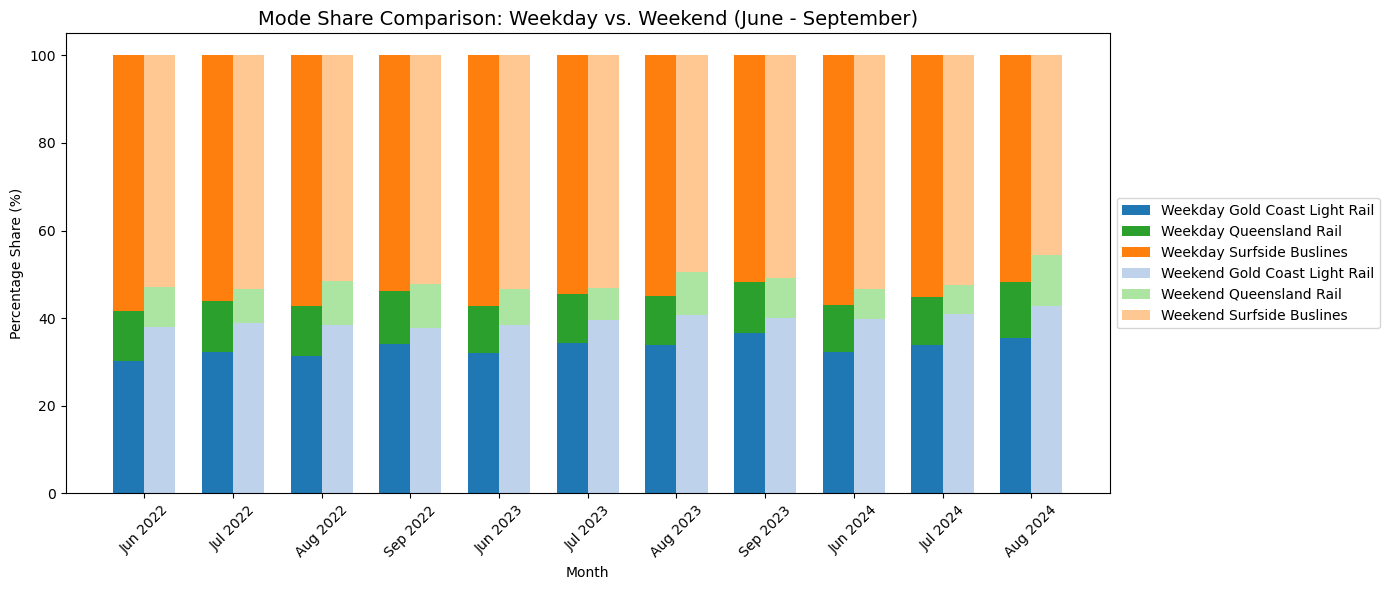

In [13]:
# Filtering the data for June, July, August, and September only
selected_months = ['Jun', 'Jul', 'Aug', 'Sep']
filtered_mode_share_df = mode_share_df[mode_share_df['Fiscal Month'].dt.strftime('%b').isin(selected_months)]

# Setting labels for the x-axis for the filtered months
labels = filtered_mode_share_df['Fiscal Month'].dt.strftime('%b %Y')

# Number of selected months
n_months = len(labels)

# Setting width of bars
bar_width = 0.35
index = np.arange(n_months)

# Plotting the double bar graph for each mode (focusing only on the selected months)
fig, ax = plt.subplots(figsize=(14, 6))

# Plotting Weekday shares
ax.bar(index, filtered_mode_share_df['Weekday Gold Coast Light Rail Share'], width=bar_width, label='Weekday Gold Coast Light Rail', color='#1f77b4')
ax.bar(index, filtered_mode_share_df['Weekday Queensland Rail Share'], bottom=filtered_mode_share_df['Weekday Gold Coast Light Rail Share'], width=bar_width, label='Weekday Queensland Rail', color='#2ca02c')
ax.bar(index, filtered_mode_share_df['Weekday Surfside Buslines Share'], bottom=filtered_mode_share_df['Weekday Gold Coast Light Rail Share'] + filtered_mode_share_df['Weekday Queensland Rail Share'], width=bar_width, label='Weekday Surfside Buslines', color='#ff7f0e')

# Plotting Weekend shares, shifted by bar_width for comparison
ax.bar(index + bar_width, filtered_mode_share_df['Weekend Gold Coast Light Rail Share'], width=bar_width, label='Weekend Gold Coast Light Rail', color='#aec7e8', alpha=0.8)
ax.bar(index + bar_width, filtered_mode_share_df['Weekend Queensland Rail Share'], bottom=filtered_mode_share_df['Weekend Gold Coast Light Rail Share'], width=bar_width, label='Weekend Queensland Rail', color='#98df8a', alpha=0.8)
ax.bar(index + bar_width, filtered_mode_share_df['Weekend Surfside Buslines Share'], bottom=filtered_mode_share_df['Weekend Gold Coast Light Rail Share'] + filtered_mode_share_df['Weekend Queensland Rail Share'], width=bar_width, label='Weekend Surfside Buslines', color='#ffbb78', alpha=0.8)

# Customising the plot
ax.set_title('Mode Share Comparison: Weekday vs. Weekend (June - September)', fontsize=14)
ax.set_xlabel('Month')
ax.set_ylabel('Percentage Share (%)')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(labels, rotation=45)

# Moving the legend outside the plot area
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)

plt.tight_layout()
plt.show()

### YoY % Change Analysis

#### Weekday Analysis

In [14]:
# Filtering weekday data for June, July, August, and September
df_weekday_modes_june_sept = df_weekday_clean[df_weekday_clean['Fiscal Month'].dt.month.isin([6, 7, 8, 9])]

# Adding Year and Month columns for Weekday data
df_weekday_modes_june_sept['Year'] = df_weekday_modes_june_sept['Fiscal Month'].dt.year
df_weekday_modes_june_sept['Month'] = df_weekday_modes_june_sept['Fiscal Month'].dt.month

# Pivoting the data for each transport mode (Weekday)
df_weekday_pivot_modes = df_weekday_modes_june_sept.pivot(index='Month', columns='Year', values=['Gold Coast Light Rail', 'Queensland Rail', 'Surfside Buslines', 'Total'])

# Calculating YoY percentage changes for each transport mode (Weekday)
df_weekday_pivot_modes['Gold Coast Light Rail YoY 2022-2023'] = (df_weekday_pivot_modes['Gold Coast Light Rail', 2023] - df_weekday_pivot_modes['Gold Coast Light Rail', 2022]) / df_weekday_pivot_modes['Gold Coast Light Rail', 2022] * 100
df_weekday_pivot_modes['Gold Coast Light Rail YoY 2023-2024'] = (df_weekday_pivot_modes['Gold Coast Light Rail', 2024] - df_weekday_pivot_modes['Gold Coast Light Rail', 2023]) / df_weekday_pivot_modes['Gold Coast Light Rail', 2023] * 100

df_weekday_pivot_modes['Queensland Rail YoY 2022-2023'] = (df_weekday_pivot_modes['Queensland Rail', 2023] - df_weekday_pivot_modes['Queensland Rail', 2022]) / df_weekday_pivot_modes['Queensland Rail', 2022] * 100
df_weekday_pivot_modes['Queensland Rail YoY 2023-2024'] = (df_weekday_pivot_modes['Queensland Rail', 2024] - df_weekday_pivot_modes['Queensland Rail', 2023]) / df_weekday_pivot_modes['Queensland Rail', 2023] * 100

df_weekday_pivot_modes['Surfside Buslines YoY 2022-2023'] = (df_weekday_pivot_modes['Surfside Buslines', 2023] - df_weekday_pivot_modes['Surfside Buslines', 2022]) / df_weekday_pivot_modes['Surfside Buslines', 2022] * 100
df_weekday_pivot_modes['Surfside Buslines YoY 2023-2024'] = (df_weekday_pivot_modes['Surfside Buslines', 2024] - df_weekday_pivot_modes['Surfside Buslines', 2023]) / df_weekday_pivot_modes['Surfside Buslines', 2023] * 100

df_weekday_pivot_modes['Total YoY 2022-2023'] = (df_weekday_pivot_modes['Total', 2023] - df_weekday_pivot_modes['Total', 2022]) / df_weekday_pivot_modes['Total', 2022] * 100
df_weekday_pivot_modes['Total YoY 2023-2024'] = (df_weekday_pivot_modes['Total', 2024] - df_weekday_pivot_modes['Total', 2023]) / df_weekday_pivot_modes['Total', 2023] * 100

# Mapping the months for better readability
months_mapping = {6: "June", 7: "July", 8: "August", 9: "September"}

# Function to format the YoY percentage change output for weekdays
def format_yoy_output_weekday(mode, df, column_2022_2023, column_2023_2024):
    print(f"• {mode}:")
    for month in df.index:
        print(f"    • {months_mapping[month]}:")
        print(f"        • YoY 2022-2023: {df[column_2022_2023][month]:.2f}%")
        if not pd.isna(df[column_2023_2024][month]):
            print(f"        • YoY 2023-2024: {df[column_2023_2024][month]:.2f}%")
        else:
            print(f"        • YoY 2023-2024: Data not available")

# Displaying the formatted YoY results for Weekday
print("\nWeekday YoY Results:")
format_yoy_output_weekday("Gold Coast Light Rail", df_weekday_pivot_modes, 
                  'Gold Coast Light Rail YoY 2022-2023', 'Gold Coast Light Rail YoY 2023-2024')

format_yoy_output_weekday("Queensland Rail", df_weekday_pivot_modes, 
                  'Queensland Rail YoY 2022-2023', 'Queensland Rail YoY 2023-2024')

format_yoy_output_weekday("Surfside Buslines", df_weekday_pivot_modes, 
                  'Surfside Buslines YoY 2022-2023', 'Surfside Buslines YoY 2023-2024')

format_yoy_output_weekday("Total", df_weekday_pivot_modes, 
                  'Total YoY 2022-2023', 'Total YoY 2023-2024')


Weekday YoY Results:
• Gold Coast Light Rail:
    • June:
        • YoY 2022-2023: 18.38%
        • YoY 2023-2024: -11.76%
    • July:
        • YoY 2022-2023: 20.98%
        • YoY 2023-2024: 6.63%
    • August:
        • YoY 2022-2023: 21.81%
        • YoY 2023-2024: 8.69%
    • September:
        • YoY 2022-2023: 12.83%
        • YoY 2023-2024: Data not available
• Queensland Rail:
    • June:
        • YoY 2022-2023: 5.58%
        • YoY 2023-2024: -11.77%
    • July:
        • YoY 2022-2023: 10.73%
        • YoY 2023-2024: 3.92%
    • August:
        • YoY 2022-2023: 8.86%
        • YoY 2023-2024: 19.12%
    • September:
        • YoY 2022-2023: -0.40%
        • YoY 2023-2024: Data not available
• Surfside Buslines:
    • June:
        • YoY 2022-2023: 8.94%
        • YoY 2023-2024: -12.55%
    • July:
        • YoY 2022-2023: 10.23%
        • YoY 2023-2024: 9.51%
    • August:
        • YoY 2022-2023: 8.35%
        • YoY 2023-2024: -2.19%
    • September:
        • YoY 2022-2023: 

/var/folders/_4/gs_29qcj0rz_nm8qy011rh_m0000gn/T/ipykernel_46861/3641142701.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_weekday_modes_june_sept['Year'] = df_weekday_modes_june_sept['Fiscal Month'].dt.year
/var/folders/_4/gs_29qcj0rz_nm8qy011rh_m0000gn/T/ipykernel_46861/3641142701.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_weekday_modes_june_sept['Month'] = df_weekday_modes_june_sept['Fiscal Month'].dt.month


#### Weekend Analysis

In [15]:
# Filtering weekend data for June, July, August, and September
df_weekend_modes_june_sept = df_weekend_clean[df_weekend_clean['Fiscal Month'].dt.month.isin([6, 7, 8, 9])]

# Adding Year and Month columns for Weekend data
df_weekend_modes_june_sept['Year'] = df_weekend_modes_june_sept['Fiscal Month'].dt.year
df_weekend_modes_june_sept['Month'] = df_weekend_modes_june_sept['Fiscal Month'].dt.month

# Pivoting the data for each transport mode (Weekend)
df_weekend_pivot_modes = df_weekend_modes_june_sept.pivot(index='Month', columns='Year', values=['Gold Coast Light Rail', 'Queensland Rail', 'Surfside Buslines', 'Total'])

# Calculating YoY percentage changes for each transport mode (Weekend)
df_weekend_pivot_modes['Gold Coast Light Rail YoY 2022-2023'] = (df_weekend_pivot_modes['Gold Coast Light Rail', 2023] - df_weekend_pivot_modes['Gold Coast Light Rail', 2022]) / df_weekend_pivot_modes['Gold Coast Light Rail', 2022] * 100
df_weekend_pivot_modes['Gold Coast Light Rail YoY 2023-2024'] = (df_weekend_pivot_modes['Gold Coast Light Rail', 2024] - df_weekend_pivot_modes['Gold Coast Light Rail', 2023]) / df_weekend_pivot_modes['Gold Coast Light Rail', 2023] * 100

df_weekend_pivot_modes['Queensland Rail YoY 2022-2023'] = (df_weekend_pivot_modes['Queensland Rail', 2023] - df_weekend_pivot_modes['Queensland Rail', 2022]) / df_weekend_pivot_modes['Queensland Rail', 2022] * 100
df_weekend_pivot_modes['Queensland Rail YoY 2023-2024'] = (df_weekend_pivot_modes['Queensland Rail', 2024] - df_weekend_pivot_modes['Queensland Rail', 2023]) / df_weekend_pivot_modes['Queensland Rail', 2023] * 100

df_weekend_pivot_modes['Surfside Buslines YoY 2022-2023'] = (df_weekend_pivot_modes['Surfside Buslines', 2023] - df_weekend_pivot_modes['Surfside Buslines', 2022]) / df_weekend_pivot_modes['Surfside Buslines', 2022] * 100
df_weekend_pivot_modes['Surfside Buslines YoY 2023-2024'] = (df_weekend_pivot_modes['Surfside Buslines', 2024] - df_weekend_pivot_modes['Surfside Buslines', 2023]) / df_weekend_pivot_modes['Surfside Buslines', 2023] * 100

df_weekend_pivot_modes['Total YoY 2022-2023'] = (df_weekend_pivot_modes['Total', 2023] - df_weekend_pivot_modes['Total', 2022]) / df_weekend_pivot_modes['Total', 2022] * 100
df_weekend_pivot_modes['Total YoY 2023-2024'] = (df_weekend_pivot_modes['Total', 2024] - df_weekend_pivot_modes['Total', 2023]) / df_weekend_pivot_modes['Total', 2023] * 100

# Mapping the months for better readability
months_mapping = {6: "June", 7: "July", 8: "August", 9: "September"}

# Function to format the YoY percentage change output for weekends
def format_yoy_output_weekend(mode, df, column_2022_2023, column_2023_2024):
    print(f"• {mode}:")
    for month in df.index:
        print(f"    • {months_mapping[month]}:")
        print(f"        • YoY 2022-2023: {df[column_2022_2023][month]:.2f}%")
        if not pd.isna(df[column_2023_2024][month]):
            print(f"        • YoY 2023-2024: {df[column_2023_2024][month]:.2f}%")
        else:
            print(f"        • YoY 2023-2024: Data not available")

# Displaying the formatted YoY results for Weekend
print("\nWeekend YoY Results:")
format_yoy_output_weekend("Gold Coast Light Rail", df_weekend_pivot_modes, 
                  'Gold Coast Light Rail YoY 2022-2023', 'Gold Coast Light Rail YoY 2023-2024')

format_yoy_output_weekend("Queensland Rail", df_weekend_pivot_modes, 
                  'Queensland Rail YoY 2022-2023', 'Queensland Rail YoY 2023-2024')

format_yoy_output_weekend("Surfside Buslines", df_weekend_pivot_modes, 
                  'Surfside Buslines YoY 2022-2023', 'Surfside Buslines YoY 2023-2024')

format_yoy_output_weekend("Total", df_weekend_pivot_modes, 
                  'Total YoY 2022-2023', 'Total YoY 2023-2024')


Weekend YoY Results:
• Gold Coast Light Rail:
    • June:
        • YoY 2022-2023: 19.70%
        • YoY 2023-2024: 16.28%
    • July:
        • YoY 2022-2023: 21.74%
        • YoY 2023-2024: -23.36%
    • August:
        • YoY 2022-2023: 34.66%
        • YoY 2023-2024: 26.54%
    • September:
        • YoY 2022-2023: 36.59%
        • YoY 2023-2024: Data not available
• Queensland Rail:
    • June:
        • YoY 2022-2023: 5.50%
        • YoY 2023-2024: -5.44%
    • July:
        • YoY 2022-2023: 13.99%
        • YoY 2023-2024: -32.93%
    • August:
        • YoY 2022-2023: 22.15%
        • YoY 2023-2024: 45.05%
    • September:
        • YoY 2022-2023: 17.24%
        • YoY 2023-2024: Data not available
• Surfside Buslines:
    • June:
        • YoY 2022-2023: 18.84%
        • YoY 2023-2024: 12.51%
    • July:
        • YoY 2022-2023: 19.40%
        • YoY 2023-2024: -27.18%
    • August:
        • YoY 2022-2023: 22.29%
        • YoY 2023-2024: 10.79%
    • September:
        • YoY 2022

/var/folders/_4/gs_29qcj0rz_nm8qy011rh_m0000gn/T/ipykernel_46861/3570747616.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_weekend_modes_june_sept['Year'] = df_weekend_modes_june_sept['Fiscal Month'].dt.year
/var/folders/_4/gs_29qcj0rz_nm8qy011rh_m0000gn/T/ipykernel_46861/3570747616.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_weekend_modes_june_sept['Month'] = df_weekend_modes_june_sept['Fiscal Month'].dt.month


#### Plotting for Weekday

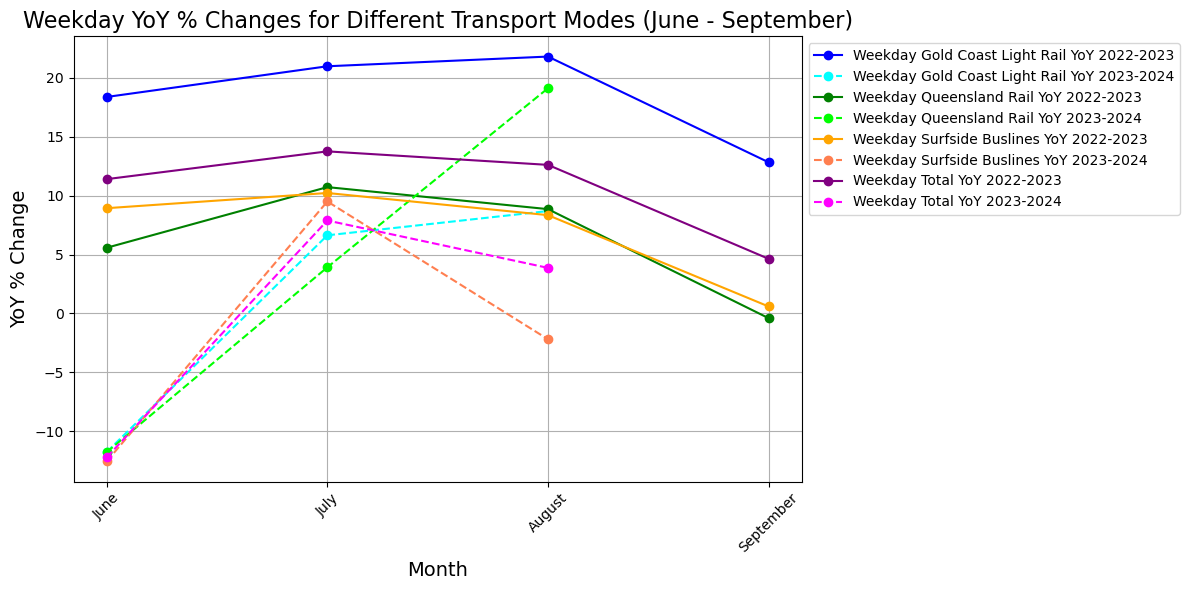

In [16]:
# Prepare data for plotting the YoY changes (Weekday and Weekend)
months = ['June', 'July', 'August', 'September']
colors_2022_2023 = ['blue', 'green', 'orange', 'purple']  # Colors for YoY 2022-2023
colors_2023_2024 = ['cyan', 'lime', 'coral', 'magenta']   # Colors for YoY 2023-2024

# Plotting the Weekday YoY changes
plt.figure(figsize=(12, 6))

plt.plot(months, df_weekday_pivot_modes['Gold Coast Light Rail YoY 2022-2023'], label='Weekday Gold Coast Light Rail YoY 2022-2023', marker='o', color=colors_2022_2023[0])
plt.plot(months, df_weekday_pivot_modes['Gold Coast Light Rail YoY 2023-2024'], label='Weekday Gold Coast Light Rail YoY 2023-2024', linestyle='--', marker='o', color=colors_2023_2024[0])

plt.plot(months, df_weekday_pivot_modes['Queensland Rail YoY 2022-2023'], label='Weekday Queensland Rail YoY 2022-2023', marker='o', color=colors_2022_2023[1])
plt.plot(months, df_weekday_pivot_modes['Queensland Rail YoY 2023-2024'], label='Weekday Queensland Rail YoY 2023-2024', linestyle='--', marker='o', color=colors_2023_2024[1])

plt.plot(months, df_weekday_pivot_modes['Surfside Buslines YoY 2022-2023'], label='Weekday Surfside Buslines YoY 2022-2023', marker='o', color=colors_2022_2023[2])
plt.plot(months, df_weekday_pivot_modes['Surfside Buslines YoY 2023-2024'], label='Weekday Surfside Buslines YoY 2023-2024', linestyle='--', marker='o', color=colors_2023_2024[2])

plt.plot(months, df_weekday_pivot_modes['Total YoY 2022-2023'], label='Weekday Total YoY 2022-2023', marker='o', color=colors_2022_2023[3])
plt.plot(months, df_weekday_pivot_modes['Total YoY 2023-2024'], label='Weekday Total YoY 2023-2024', linestyle='--', marker='o', color=colors_2023_2024[3])

# Customising the plot for Weekday YoY
plt.title('Weekday YoY % Changes for Different Transport Modes (June - September)', fontsize=16)
plt.xlabel('Month', fontsize=14)
plt.ylabel('YoY % Change', fontsize=14)
plt.xticks(rotation=45)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))  # Put the legend outside the plot for clarity
plt.grid(True)

# Show the Weekday plot
plt.tight_layout()
plt.show()

#### Findings:
##### 1. Overview: This line graph presents the Year-over-Year (YoY) percentage changes for weekday trips across different transport modes from June to September, comparing the years 2022-2023 and 2023-2024. 
##### 2. Observation:
      A. Gold Coast Light Rail 2022 - 23 (Blue) shows steady growth, peaking at around 20% in August, before a slight decline in September.
      B. Gold Coast Light Rail 2023 - 24 (Green) starts lower in June (~5% YoY change), increases significantly in August (~15% growth), and then declines in September.
      C. Queensland Rail 2022 - 23 (Dark Green) shows a steady increase from 5% in June to around 10% in August, followed by a small decline in September.
      D. Queensland Rail 2023 - 24 (Light Green) shows a similar pattern to 2022-2023, starting low (~3%) in June and peaking in August (~10%), but slightly more volatile, with a notable drop after August.
      E. Surfside Buslines 2022 - 23 (Solid Orange) shows consistent growth, peaking at around 12% in August, with a slight dip in September.
      F. Surfside Buslines 2023 - 24 (Dashed Orange) starts low with a -10% change in June but recovers quickly, peaking in August (~15%) before dipping again in September.
      G. Total YoY 2022 - 23 (Purple) shows a steady growth from June (~7%) to August (~10%) before a decline in September.
      H. Total YoY 2023 - 24 (Pink) starts with a -10% decline in June but recovers strongly in August to about 8%, followed by another dip in September.
##### 3. Conclusion: The August 2024 data (when the 50c fare trial occurred) shows a clear peak across all transport modes, particularly for Gold Coast Light Rail and Surfside Buslines, indicating that the trial led to a strong growth in ridership. 

#### Plotting for Weekend

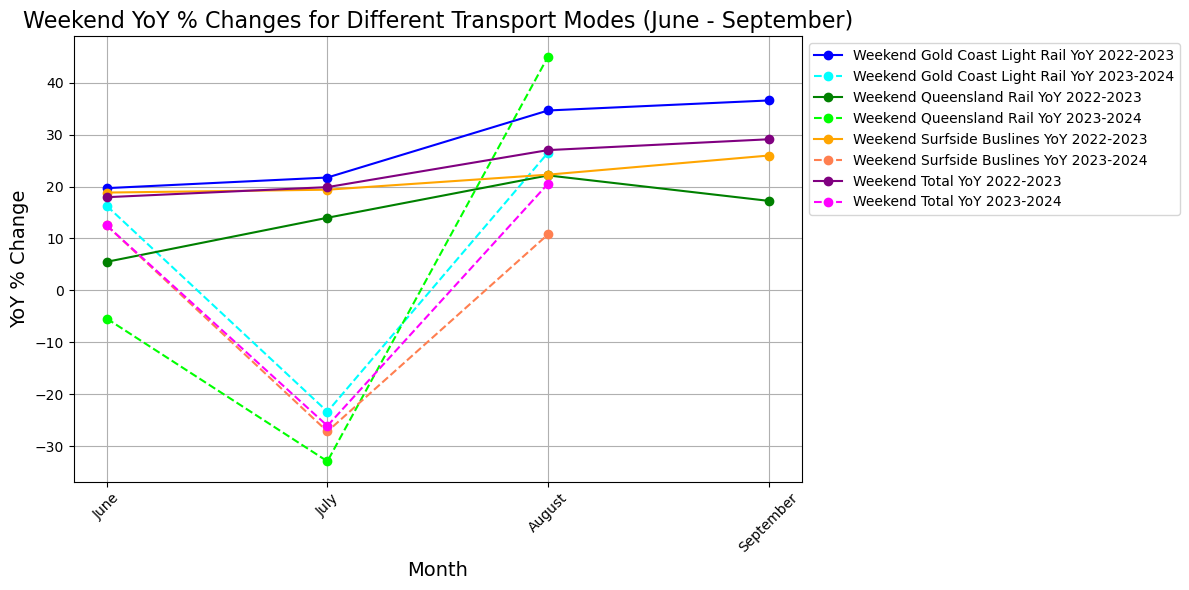

In [17]:
# Plotting the Weekend YoY changes
plt.figure(figsize=(12, 6))

plt.plot(months, df_weekend_pivot_modes['Gold Coast Light Rail YoY 2022-2023'], label='Weekend Gold Coast Light Rail YoY 2022-2023', marker='o', color=colors_2022_2023[0])
plt.plot(months, df_weekend_pivot_modes['Gold Coast Light Rail YoY 2023-2024'], label='Weekend Gold Coast Light Rail YoY 2023-2024', linestyle='--', marker='o', color=colors_2023_2024[0])

plt.plot(months, df_weekend_pivot_modes['Queensland Rail YoY 2022-2023'], label='Weekend Queensland Rail YoY 2022-2023', marker='o', color=colors_2022_2023[1])
plt.plot(months, df_weekend_pivot_modes['Queensland Rail YoY 2023-2024'], label='Weekend Queensland Rail YoY 2023-2024', linestyle='--', marker='o', color=colors_2023_2024[1])

plt.plot(months, df_weekend_pivot_modes['Surfside Buslines YoY 2022-2023'], label='Weekend Surfside Buslines YoY 2022-2023', marker='o', color=colors_2022_2023[2])
plt.plot(months, df_weekend_pivot_modes['Surfside Buslines YoY 2023-2024'], label='Weekend Surfside Buslines YoY 2023-2024', linestyle='--', marker='o', color=colors_2023_2024[2])

plt.plot(months, df_weekend_pivot_modes['Total YoY 2022-2023'], label='Weekend Total YoY 2022-2023', marker='o', color=colors_2022_2023[3])
plt.plot(months, df_weekend_pivot_modes['Total YoY 2023-2024'], label='Weekend Total YoY 2023-2024', linestyle='--', marker='o', color=colors_2023_2024[3])

# Customising the plot for Weekend YoY
plt.title('Weekend YoY % Changes for Different Transport Modes (June - September)', fontsize=16)
plt.xlabel('Month', fontsize=14)
plt.ylabel('YoY % Change', fontsize=14)
plt.xticks(rotation=45)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))  # Put the legend outside the plot for clarity
plt.grid(True)

# Show the Weekend plot
plt.tight_layout()
plt.show()

#### Findings:
##### 1. Overview: This line graph presents the Year-over-Year (YoY) percentage changes for weekend trips across different transport modes from June to September, comparing the years 2022-2023 and 2023-2024. 

##### 3. Conclusion: The data highlights how weekend ridership, like weekday trips, saw a significant boost in August 2024, likely due to the 50c fare trial, with most transport modes recovering or growing in the months following July’s dip.

#### Comparing Total YoY Weekday vs Weekend

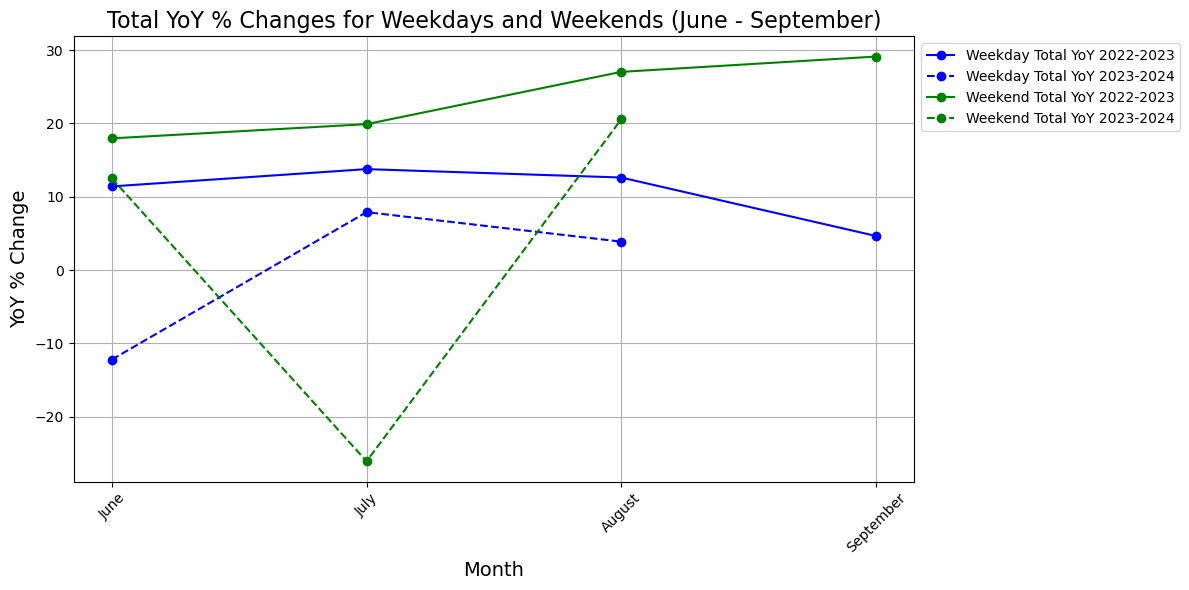

In [18]:
# Preparing data for plotting the Total YoY changes (Weekdays and Weekends)
months = ['June', 'July', 'August', 'September']
colors = ['blue', 'green']  # Colors for weekdays and weekends

# Plotting the Total YoY changes for Weekdays
plt.figure(figsize=(12, 6))

plt.plot(months, df_weekday_pivot_modes['Total YoY 2022-2023'], label='Weekday Total YoY 2022-2023', marker='o', color=colors[0])
plt.plot(months, df_weekday_pivot_modes['Total YoY 2023-2024'], label='Weekday Total YoY 2023-2024', linestyle='--', marker='o', color=colors[0])

# Plotting the Total YoY changes for Weekends
plt.plot(months, df_weekend_pivot_modes['Total YoY 2022-2023'], label='Weekend Total YoY 2022-2023', marker='o', color=colors[1])
plt.plot(months, df_weekend_pivot_modes['Total YoY 2023-2024'], label='Weekend Total YoY 2023-2024', linestyle='--', marker='o', color=colors[1])

# Customising the plot for combined Total Weekday and Weekend YoY
plt.title('Total YoY % Changes for Weekdays and Weekends (June - September)', fontsize=16)
plt.xlabel('Month', fontsize=14)
plt.ylabel('YoY % Change', fontsize=14)
plt.xticks(rotation=45)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))  # Put the legend outside the plot for clarity
plt.grid(True)

plt.tight_layout()
plt.show()

#### Findings:
##### 1. Overview: This graph shows the Total Year-over-Year (YoY) Percentage Changes for both weekdays and weekends from June to September, comparing the periods 2022-2023 and 2023-2024.
##### 3. Conclusion: Weekends showed a more substantial rebound compared to weekdays in 2023-2024, indicating that the fare trial may have had a greater impact on weekend transport usage.

### Prediction

I will be performing Linear Regression and ARIMA for Predicting from September to end to the year

I tried pulling data from my df's but was getting a lot of errors so I am hardcoding the dataset values in the array.

#### Predicition for Weekday (LR)

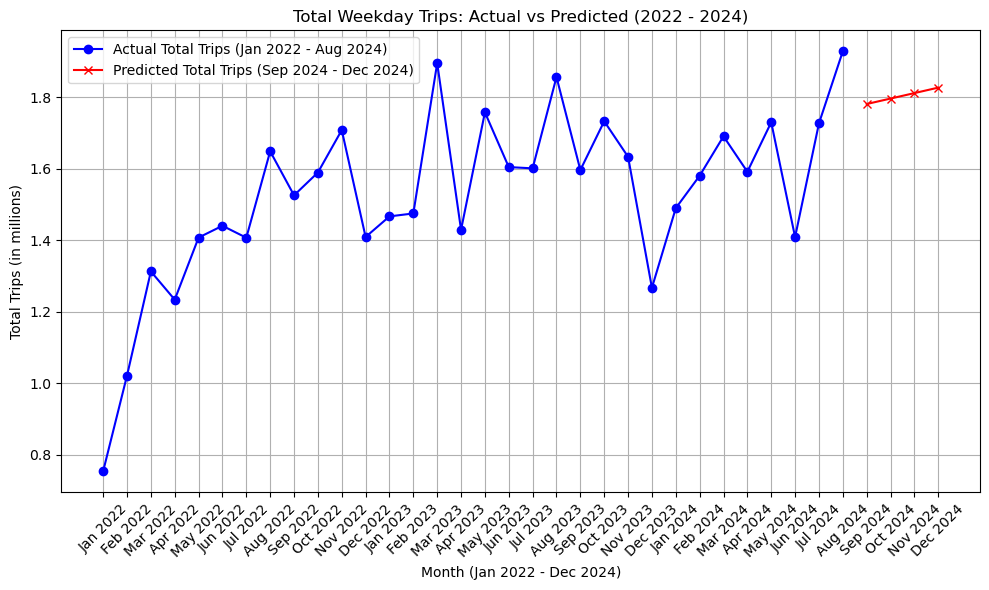

Predicted Total Trips for Month 9 of 2024: 1.78 million
Predicted Total Trips for Month 10 of 2024: 1.80 million
Predicted Total Trips for Month 11 of 2024: 1.81 million
Predicted Total Trips for Month 12 of 2024: 1.83 million


In [19]:
from sklearn.linear_model import LinearRegression

# Manually inputting data
months = np.arange(1, 33)  # Representing months from Jan 2022 to Aug 2024

# Total trips (in millions)
total_weekday_trips = np.array([0.753481, 1.020974, 1.312482, 1.233495, 1.407239, 
                                1.440215, 1.406820, 1.648552, 1.525410, 1.589260, 
                                1.707978, 1.408818, 1.466512, 1.474723, 1.895393, 
                                1.428894, 1.757618, 1.604438, 1.600930, 1.856500, 
                                1.596185, 1.732687, 1.633199, 1.266720, 1.489558,
                                1.580264, 1.690587, 1.591384, 1.729825, 1.408562, 
                                1.726686, 1.928351])  # Weekday data up to Aug 2024

# Preparing the data for Linear Regression
X_train = months.reshape(-1, 1)  # Independent variable (month numbers)
y_train = total_weekday_trips  # Dependent variable (total trips)

# Fitting the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predicting for September to December 2024
months_predict = np.array([33, 34, 35, 36]).reshape(-1, 1)
predicted_trips = model.predict(months_predict)

# Plotting the actual and predicted data
plt.figure(figsize=(10, 6))
plt.plot(months, total_weekday_trips, label='Actual Total Trips (Jan 2022 - Aug 2024)', color='blue', marker='o')
plt.plot(np.arange(33, 37), predicted_trips, label='Predicted Total Trips (Sep 2024 - Dec 2024)', color='red', marker='x')

# Customising the plot
plt.title('Total Weekday Trips: Actual vs Predicted (2022 - 2024)')
plt.xlabel('Month (Jan 2022 - Dec 2024)')
plt.ylabel('Total Trips (in millions)')
plt.xticks(np.arange(1, 37), labels=['Jan 2022', 'Feb 2022', 'Mar 2022', 'Apr 2022', 'May 2022', 'Jun 2022',
                                     'Jul 2022', 'Aug 2022', 'Sep 2022', 'Oct 2022', 'Nov 2022', 'Dec 2022',
                                     'Jan 2023', 'Feb 2023', 'Mar 2023', 'Apr 2023', 'May 2023', 'Jun 2023',
                                     'Jul 2023', 'Aug 2023', 'Sep 2023', 'Oct 2023', 'Nov 2023', 'Dec 2023',
                                     'Jan 2024', 'Feb 2024', 'Mar 2024', 'Apr 2024', 'May 2024', 'Jun 2024',
                                     'Jul 2024', 'Aug 2024', 'Sep 2024', 'Oct 2024', 'Nov 2024', 'Dec 2024'],
           rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()

plt.show()

# Displaying the predicted values
for i, pred in enumerate(predicted_trips, start=1):
    print(f"Predicted Total Trips for Month {i+8} of 2024: {pred:.2f} million")

#### Findings:
##### 1. Overview: This graph represents the total weekday trips for the period January 2022 to December 2024, showing both actual trips (from January 2022 to August 2024) and predicted trips (from September 2024 to December 2024).
##### 3. Conclusion: The graph demonstrates that total weekday trips have increased consistently from 2022 to 2024, with notable peaks in 2024, likely influenced by fare trial. The predicted data for September to December 2024 suggests that weekday trips will continue to rise, although at a gradual pace, with total trips expected to reach 1.83 million by the end of 2024.

#### Prediction for Weekend (LR)

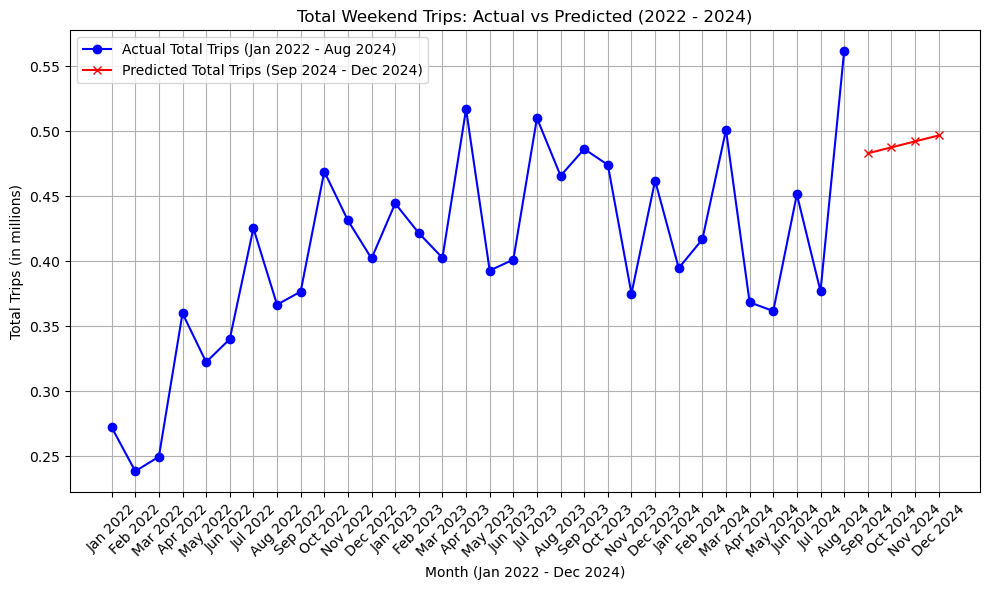

Predicted Total Trips for Month 9 of 2024: 0.48 million
Predicted Total Trips for Month 10 of 2024: 0.49 million
Predicted Total Trips for Month 11 of 2024: 0.49 million
Predicted Total Trips for Month 12 of 2024: 0.50 million


In [20]:
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt

# Manually inputting the weekend data for the total trips (in millions)
total_weekend_trips = np.array([0.272378, 0.238572, 0.249721, 0.359984, 0.322460, 
                                0.340170, 0.425422, 0.366616, 0.376670, 0.468998, 
                                0.431385, 0.402127, 0.444473, 0.421655, 0.402616, 
                                0.516950, 0.392874, 0.401246, 0.510048, 0.465696, 
                                0.486326, 0.474122, 0.375049, 0.462073, 0.394782,
                                0.416840, 0.500992, 0.368443, 0.361744, 0.451406, 
                                0.376952, 0.561416])  # Values for Jan 2022 - Aug 2024

# Independent variable (months from Jan 2022 to Aug 2024)
months = np.arange(1, 33)  # Representing months from Jan 2022 to Aug 2024

# Preparing the data for Linear Regression
X_train = months.reshape(-1, 1)  # Independent variable (month numbers)
y_train = total_weekend_trips  # Dependent variable (total weekend trips)

# Fitting the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predicting for September to December 2024
months_predict = np.array([33, 34, 35, 36]).reshape(-1, 1)
predicted_trips = model.predict(months_predict)

# Plotting the actual and predicted data
plt.figure(figsize=(10, 6))
plt.plot(months, total_weekend_trips, label='Actual Total Trips (Jan 2022 - Aug 2024)', color='blue', marker='o')
plt.plot(np.arange(33, 37), predicted_trips, label='Predicted Total Trips (Sep 2024 - Dec 2024)', color='red', marker='x')

# Customising the plot
plt.title('Total Weekend Trips: Actual vs Predicted (2022 - 2024)')
plt.xlabel('Month (Jan 2022 - Dec 2024)')
plt.ylabel('Total Trips (in millions)')
plt.xticks(np.arange(1, 37), labels=['Jan 2022', 'Feb 2022', 'Mar 2022', 'Apr 2022', 'May 2022', 'Jun 2022',
                                     'Jul 2022', 'Aug 2022', 'Sep 2022', 'Oct 2022', 'Nov 2022', 'Dec 2022',
                                     'Jan 2023', 'Feb 2023', 'Mar 2023', 'Apr 2023', 'May 2023', 'Jun 2023',
                                     'Jul 2023', 'Aug 2023', 'Sep 2023', 'Oct 2023', 'Nov 2023', 'Dec 2023',
                                     'Jan 2024', 'Feb 2024', 'Mar 2024', 'Apr 2024', 'May 2024', 'Jun 2024',
                                     'Jul 2024', 'Aug 2024', 'Sep 2024', 'Oct 2024', 'Nov 2024', 'Dec 2024'],
           rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()

plt.show()

# Displaying the predicted values
for i, pred in enumerate(predicted_trips, start=1):
    print(f"Predicted Total Trips for Month {i+8} of 2024: {pred:.2f} million")

#### Findings:
##### 1. Overview: This graph represents the total weekend trips for the period January 2022 to December 2024, showing both actual trips (from January 2022 to August 2024) and predicted trips (from September 2024 to December 2024).
##### 3. Conclusion: The total weekend trips fluctuate over the period from January 2022 to August 2024. The graph demonstrates that weekend trips have generally increased from January 2022 to August 2024. The predicted trips for the remainder of 2024 (September to December) suggest continued growth, with total trips projected to reach around 0.50 million trips by December 2024.

#### Prediction for Weekday (ARIMA)

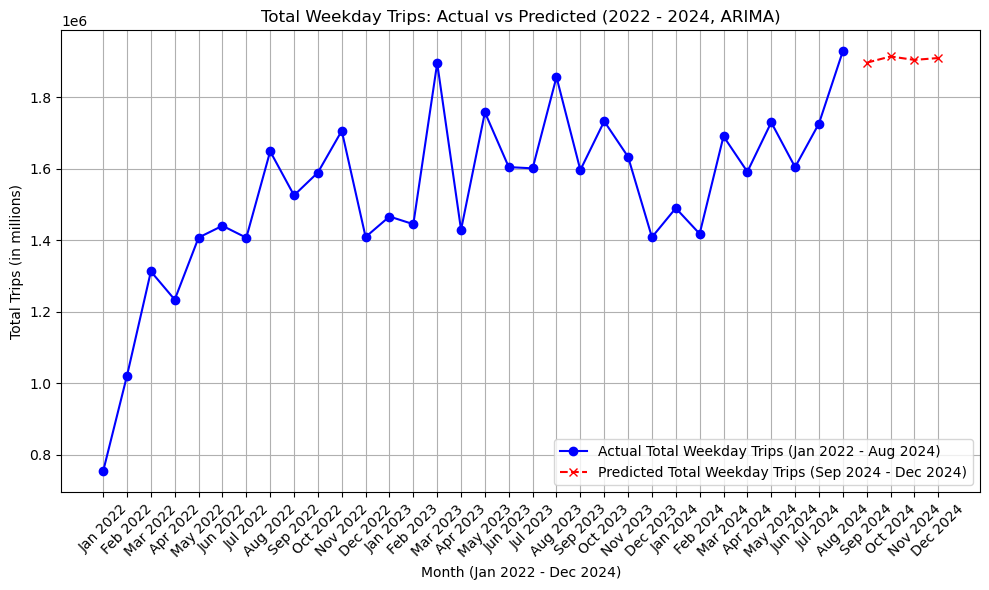

Predicted Total Weekday Trips for September 2024: 1896469.32
Predicted Total Weekday Trips for October 2024: 1913957.83
Predicted Total Weekday Trips for November 2024: 1904364.61
Predicted Total Weekday Trips for December 2024: 1909626.92


In [21]:
from statsmodels.tsa.arima.model import ARIMA

# Hardcoded actual total trips (Jan 2022 - Aug 2024)
total_weekday_trips = np.array([
    753481, 1020974, 1312482, 1233495, 1407239, 1440215, 1406820, 1648552, 1525400, 1589260, 
    1705978, 1408818, 1466152, 1444723, 1895393, 1428894, 1757618, 1604438, 1600900, 1856500, 
    1596185, 1732677, 1633199, 1408260, 1489558, 1417749, 1690587, 1591374, 1729625, 1604358, 
    1726268, 1928351
])  # Jan 2022 to Aug 2024 (32 months)

# Preparing ARIMA model
model = ARIMA(total_weekday_trips, order=(1, 1, 1))
model_fit = model.fit()

# Forecasting for September to December 2024 (4 steps ahead)
forecast_steps = 4
forecast = model_fit.forecast(steps=forecast_steps)

# Combining actual and predicted values for continuous plotting
all_trips_actual = np.concatenate((total_weekday_trips, [np.nan] * forecast_steps))  # Actual + NaN for predicted
all_trips_predicted = np.concatenate(([np.nan] * len(total_weekday_trips), forecast))  # NaN for actual + predicted

# Plot the actual and predicted data
plt.figure(figsize=(10, 6))

# Plot actual data
plt.plot(np.arange(1, len(total_weekday_trips) + 1), total_weekday_trips, label='Actual Total Weekday Trips (Jan 2022 - Aug 2024)', color='blue', marker='o')

# Plot predicted data with different color and dotted line
plt.plot(np.arange(len(total_weekday_trips) + 1, len(total_weekday_trips) + forecast_steps + 1), forecast, label='Predicted Total Weekday Trips (Sep 2024 - Dec 2024)', color='red', marker='x', linestyle='--')

# Customising the plot
plt.title('Total Weekday Trips: Actual vs Predicted (2022 - 2024, ARIMA)')
plt.xlabel('Month (Jan 2022 - Dec 2024)')
plt.ylabel('Total Trips (in millions)')
plt.xticks(np.arange(1, 37), labels=['Jan 2022', 'Feb 2022', 'Mar 2022', 'Apr 2022', 'May 2022', 'Jun 2022',
                                     'Jul 2022', 'Aug 2022', 'Sep 2022', 'Oct 2022', 'Nov 2022', 'Dec 2022',
                                     'Jan 2023', 'Feb 2023', 'Mar 2023', 'Apr 2023', 'May 2023', 'Jun 2023',
                                     'Jul 2023', 'Aug 2023', 'Sep 2023', 'Oct 2023', 'Nov 2023', 'Dec 2023',
                                     'Jan 2024', 'Feb 2024', 'Mar 2024', 'Apr 2024', 'May 2024', 'Jun 2024',
                                     'Jul 2024', 'Aug 2024', 'Sep 2024', 'Oct 2024', 'Nov 2024', 'Dec 2024'],
           rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()

plt.show()

# Displaying the predicted values for Sep-Dec 2024
month_names = ['September', 'October', 'November', 'December']
for i, pred in enumerate(forecast):
    print(f"Predicted Total Weekday Trips for {month_names[i]} 2024: {pred:.2f}")

#### Findings:
##### 1. Overview: This graph shows the Total Weekday Trips from January 2022 to December 2024, where actual data (from January 2022 to August 2024) is compared to predicted data (from September 2024 to December 2024) using the ARIMA forecasting model.
##### 3. Conclusion: The ARIMA model forecasts a continued increase in weekday trips from September to December 2024, with total trips expected to reach 1.91 million by December 2024. The overall trend shows steady growth in weekday transport usage over the observed period, with notable peaks likely driven by external factors such as 50c fare trial.

#### ARIMA for Weekend

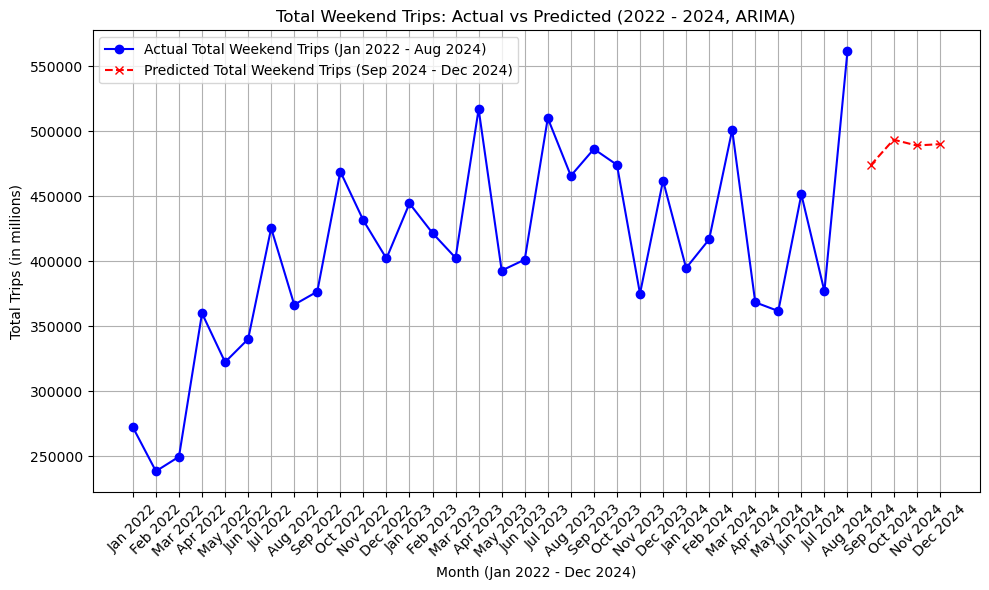

Predicted Total Weekend Trips for September 2024: 473724.98
Predicted Total Weekend Trips for October 2024: 493479.72
Predicted Total Weekend Trips for November 2024: 489029.44
Predicted Total Weekend Trips for December 2024: 490031.99


In [22]:
from statsmodels.tsa.arima.model import ARIMA
import numpy as np
import matplotlib.pyplot as plt

# Hardcoded actual total weekend trips (Jan 2022 - Aug 2024)
total_weekend_trips = np.array([
    272378, 238572, 249721, 359984, 322460, 340170, 425422, 366616, 376670, 468998,
    431385, 402127, 444473, 421655, 402616, 516950, 392874, 401246, 510048, 465696,
    486326, 474122, 375049, 462073, 394782, 416840, 500992, 368443, 361744, 451406,
    376952, 561416
])  # Jan 2022 to Aug 2024 (32 months)

# Preparing ARIMA model
model = ARIMA(total_weekend_trips, order=(1, 1, 1))
model_fit = model.fit()

# Forecasting for September to December 2024 (4 steps ahead)
forecast_steps = 4
forecast = model_fit.forecast(steps=forecast_steps)

# Combining actual and predicted values for continuous plotting
all_trips_actual = np.concatenate((total_weekend_trips, [np.nan] * forecast_steps))  # Actual + NaN for predicted
all_trips_predicted = np.concatenate(([np.nan] * len(total_weekend_trips), forecast))  # NaN for actual + predicted

# Plot the actual and predicted data
plt.figure(figsize=(10, 6))

# Plot actual data
plt.plot(np.arange(1, len(total_weekend_trips) + 1), total_weekend_trips, label='Actual Total Weekend Trips (Jan 2022 - Aug 2024)', color='blue', marker='o')

# Plot predicted data with different color and dotted line
plt.plot(np.arange(len(total_weekend_trips) + 1, len(total_weekend_trips) + forecast_steps + 1), forecast, label='Predicted Total Weekend Trips (Sep 2024 - Dec 2024)', color='red', marker='x', linestyle='--')

# Customising the plot
plt.title('Total Weekend Trips: Actual vs Predicted (2022 - 2024, ARIMA)')
plt.xlabel('Month (Jan 2022 - Dec 2024)')
plt.ylabel('Total Trips (in millions)')
plt.xticks(np.arange(1, 37), labels=['Jan 2022', 'Feb 2022', 'Mar 2022', 'Apr 2022', 'May 2022', 'Jun 2022',
                                     'Jul 2022', 'Aug 2022', 'Sep 2022', 'Oct 2022', 'Nov 2022', 'Dec 2022',
                                     'Jan 2023', 'Feb 2023', 'Mar 2023', 'Apr 2023', 'May 2023', 'Jun 2023',
                                     'Jul 2023', 'Aug 2023', 'Sep 2023', 'Oct 2023', 'Nov 2023', 'Dec 2023',
                                     'Jan 2024', 'Feb 2024', 'Mar 2024', 'Apr 2024', 'May 2024', 'Jun 2024',
                                     'Jul 2024', 'Aug 2024', 'Sep 2024', 'Oct 2024', 'Nov 2024', 'Dec 2024'],
           rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()

plt.show()

# Displaying the predicted values for Sep-Dec 2024
month_names = ['September', 'October', 'November', 'December']
for i, pred in enumerate(forecast):
    print(f"Predicted Total Weekend Trips for {month_names[i]} 2024: {pred:.2f}")

#### Findings:
##### 1. Overview: This graph shows the Total Weekend Trips from January 2022 to December 2024, where actual data (from January 2022 to August 2024) is compared to predicted data (from September 2024 to December 2024) using the ARIMA forecasting model.
##### 2. Observation: The predicted values seem to deviate from the actual trend in the data.
##### 3. Conclusion: The current ARIMA model uses order=(1, 1, 1), which may not be capturing the data's underlying trends and seasonality well enough. 

### Comparison of Linear Regression (LR) and ARIMA Predictions:

#### Modeling Approach: ####

1. LR is a simple predictive model that assumes a linear relationship between the independent variable (months) and the dependent variable (trips). It fits a straight line to the data, which works well for datasets where the growth is relatively steady over time.
LR does not account for seasonal patterns, cycles, or any autocorrelation in the data. Therefore, it may oversimplify complex time series data, leading to less accurate predictions when the data shows non-linear trends or seasonality.

2. ARIMA (Auto-Regressive Integrated Moving Average) is a more sophisticated model for time series forecasting. It accounts for autocorrelation (relationship between an observation and past observations) and can handle seasonal patterns with extensions like SARIMA.
ARIMA is better suited for datasets that show fluctuating trends or patterns, as it can capture dependencies between current and past values of the time series. It also deals with stationarity, which is essential for accurate time series modeling.

#### Handling Seasonality and Trends: ####

1. LR fails to capture the seasonality or cyclical patterns that may exist in the trips. The straight-line assumption oversimplifies the fluctuations present in the actual data. LR tends to predict a steady increase or decrease, which might not reflect the inherent variability of trips. In this case, it might give more of a long-term trend than precise short-term forecasting.

2. ARIMA, especially with seasonal components like SARIMA, is well-equipped to capture seasonal variations and trends. It looks at past patterns in the data to inform predictions, resulting in more accurate forecasts in time series that exhibit fluctuations.
ARIMA performed better at predicting the seasonal and fluctuating patterns of weekend trips, though the original ARIMA model might need further tuning (like adjusting the seasonal order) for even more accurate results.

#### Accuracy of Predictions: ####

1. The predictions from LR appeared to deviate from the actual data because it did not capture the peaks and valleys (seasonal fluctuations). The simplicity of the model could not handle the complex changes in the data over time, and its predictions were somewhat far from actual. However, LR could still provide a general trend direction and would be useful for datasets where steady, linear growth is expected.
2. The ARIMA model provided better short-term predictions, as it incorporated past data points and trends. It accounted for fluctuations in the dataset and predicted values closer to the actual trend. Nevertheless, as observed in the graph (Weekend), the initial ARIMA model might still need refinement (possibly incorporating seasonal patterns more effectively) to get more accurate results.